In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px

#Tiesiog daugiau biblioteku instaliuojama.

In [2]:
# Nuskaitome failą
nypd = pd.read_csv('../../DATA/NYPD.csv')
#nuskaitau dvi eilutes
nypd.head(2)

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,226323781,3/30/2021,23:45:00,QUEENS,100,0.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,25-44,M,BLACK,1036867,153432,40.587664,-73.81056,POINT (-73.81055977899997 40.587663570000075)
1,226323779,3/30/2021,16:20:00,BROOKLYN,73,2.0,MULTI DWELL - PUBLIC HOUS,False,25-44,M,BLACK,25-44,M,BLACK,1009548,187629,40.681647,-73.90879,POINT (-73.90879049699998 40.68164709200005)


In [ ]:
# Nuskaitome failą. Konvertuojame data ir laika ir juos sujungiame i viena stulpeli
nypd = pd.read_csv('../../DATA/NYPD.csv', parse_dates=['OCOUR_DATE','OCCUR_TIME']
 # Nuskaitome failą. Konvertuojame data ir laika ir juos sujungiame i viena stulpeli
nypd = pd.read_csv('../DATA/NYPD.csv', parse_dates={'DATA':['OCCUR_DATE', 'OCCUR_TIME']})

#nuskaitau dvi eilutes
nypd.head(2)
# Sugrupuojame duomenis pagal du kriterijus BORO ir STATISTICAL...
nb_flag = nypd.groupby(['BORO', 'STATISTICAL_MURDER_FLAG'])
nb_flag.groups.keys()
# GAunu duomenis sugrupuotus pagal BORO ie STATISTICA... SVARBU SKLIAUSTUOSE IRASYTA
# TA FORMATA KURIS YRA ISVEDAMAS SU GROUPS.KEYS raktazodziu... 
nb_flag.get_group(('BRONX', False))

In [ ]:
# Nuskaitome faila, konvertuojame data ir sujungiame laiko ir datos stulpelius i viena
nypd = pd.read_csv('../DATA/NYPD.csv', parse_dates={'DATA':['OCCUR_DATE', 'OCCUR_TIME']})
# Atrenkamos valandos is stulpelio DATA ir sukuriamas naujas stulpelis, kuris pavadintas V
nypd['V'] = nypd['DATA'].dt.hour
#Sukuriama nauja lentele, kuria sudaro [] surasyti stulpeliu pavadinimai
nypdII = nypd[['DATA', 'V', 'BORO', 'STATISTICAL_MURDER_FLAG']]
#Kuriama lentele, kuriame duomenys sugrupuoti pagal BORO
nypd_boro = nypdII.groupby('BORO')
#grupuojame pagal rajonus
boros = nypd_boro.groups.keys()
# Braizymui
fig, axis = plt.subplots()
#atliekamas ciklas. Atrenkami duomenys pagal boro group
for boro in boros:
b = nypd_boro.get_group(boro)
# skaiciuoja,kiek kartu pasirodo ta pati valanda ir duomenys isdestomi didejimo tvarka
h = b['V'].value_counts().sort_index(ascending=True) 
#braizomi grafikai
axis.plot(h.index.tolist(), h.values.tolist(), label=boro, marker='o')
axis.set_xticks(h.index)
axis.legend(loc='best')
plt.show()

C:\Users\eleta\AppData\Local\Temp\ipykernel_19468\3941985034.py:7: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  nypd = pd.read_csv('../../DATA/NYPD.csv', parse_dates={'DATA':['OCCUR_DATE', 'OCCUR_TIME']})


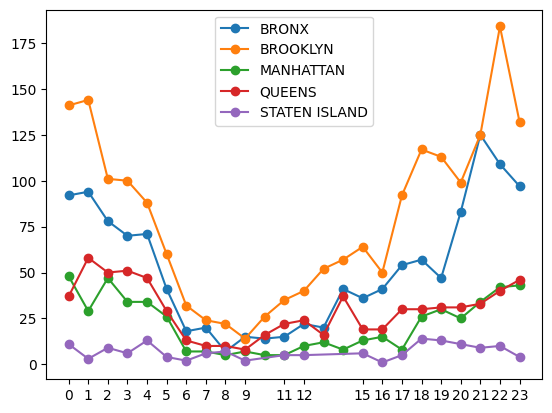

In [8]:
#Atvaizduokite grafiką, kuriame būtų tik mirtinų susiškaudymų kiekiai per valandą kiekviename rajone. Panaudokite plot() grafiką.

import pandas as pd
import matplotlib.pyplot as plt

# Nuskaitome failą, konvertuojame datą ir sujungiame laiko ir datos stulpelius į vieną
nypd = pd.read_csv('../../DATA/NYPD.csv', parse_dates={'DATA':['OCCUR_DATE', 'OCCUR_TIME']})

# Atrenkamos valandos iš stulpelio DATA ir sukuriamas naujas stulpelis, kuris pavadintas V
nypd['V'] = nypd['DATA'].dt.hour

# Sukuriama nauja lentelė, kurią sudaro pasirinkti stulpeliai
nypdII = nypd[['DATA', 'V', 'BORO', 'STATISTICAL_MURDER_FLAG']]

# Filtruojame tik mirtinus susišaudymus ir grupuojame pagal BORO
nypd_boro = nypdII[nypdII['STATISTICAL_MURDER_FLAG'] == True].groupby('BORO')

# Grupavimui imame BORO reikšmes
boros = nypd_boro.groups.keys()

# Brėžimui
fig, axis = plt.subplots()

# Atliekamas ciklas. Atrenkami duomenys pagal BORO grupes
for boro in boros:
    b = nypd_boro.get_group(boro)
    # Skaičiuoja, kiek kartų pasirodo ta pati valanda ir duomenys išdėstomi didėjimo tvarka
    h = b['V'].value_counts().sort_index(ascending=True)
    # Brėžiami grafikai
    axis.plot(h.index.tolist(), h.values.tolist(), label=boro, marker='o')

axis.set_xticks(h.index)
axis.legend(loc='best')
plt.show()

C:\Users\eleta\AppData\Local\Temp\ipykernel_19468\2922894430.py:7: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  nypd = pd.read_csv('../../DATA/NYPD.csv', parse_dates={'DATA':['OCCUR_DATE', 'OCCUR_TIME']})


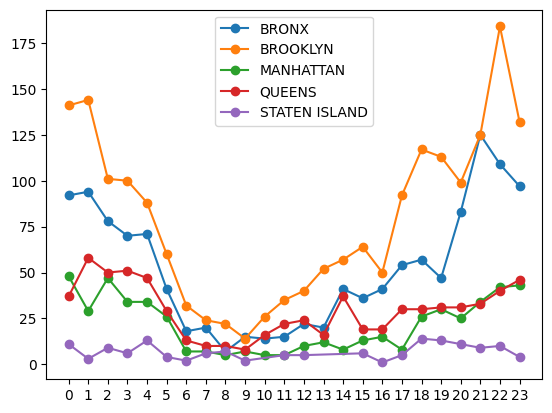

In [13]:
#Atvaizduokite grafiką, kuriame būtų tik mirtinų susiškaudymų kiekiai per valandą kiekviename rajone. Panaudokite plot() grafiką.

import pandas as pd
import matplotlib.pyplot as plt

# Nuskaitome failą, konvertuojame datą ir sujungiame laiko ir datos stulpelius į vieną
nypd = pd.read_csv('../../DATA/NYPD.csv', parse_dates={'DATA':['OCCUR_DATE', 'OCCUR_TIME']})

# Atrenkamos valandos iš stulpelio DATA ir sukuriamas naujas stulpelis, kuris pavadintas V
nypd['V'] = nypd['DATA'].dt.hour

# Sukuriama nauja lentelė, kurią sudaro pasirinkti stulpeliai
nypdII = nypd[['DATA', 'V', 'BORO', 'STATISTICAL_MURDER_FLAG']]

# Filtruojame tik mirtinus susišaudymus ir grupuojame pagal BORO
nypd_boro = nypdII[nypdII['STATISTICAL_MURDER_FLAG'] == True].groupby('BORO')

# Grupavimui imame BORO reikšmes
boros = nypd_boro.groups.keys()

# Brėžimui
fig, axis = plt.subplots()

# Atliekamas ciklas. Atrenkami duomenys pagal BORO grupes
for boro in boros:
    b = nypd_boro.get_group(boro)
    # Skaičiuoja, kiek kartų pasirodo ta pati valanda ir duomenys išdėstomi didėjimo tvarka
    h = b['V'].value_counts().sort_index(ascending=True)
    #Ivedama tam,kad x asyje butu visi skaiciai, t.y. nebutu praleista 10, 13 ir 14. Ziur. grafika virsuje.
    valandos=np.arange(0,24)
    # Brėžiami grafikai
    axis.plot(h.index.tolist(), h.values.tolist(), label=boro, marker='o')

axis.set_xticks(valandos)# Irasome valandos, ka butu visos valandos.
axis.legend(loc='best')
plt.show()

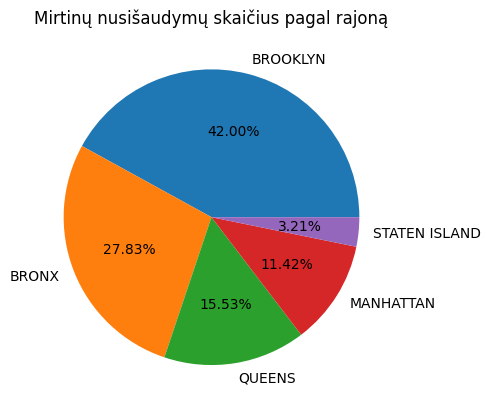

In [11]:
#Su pie plot atvaizduokite, kiek mirtinų nusišaudymų tenka kiekvienam rajonui.
import pandas as pd
import matplotlib.pyplot as plt

# Nuskaitome failą, konvertuojame datą ir sujungiame laiko ir datos stulpelius į vieną
nypd = pd.read_csv('../../DATA/NYPD.csv')

# Filtruojame tik mirtinus susišaudymus
fatal_shootings = nypd[nypd['STATISTICAL_MURDER_FLAG'] == True]

# Grupavimas pagal BORO ir skaičiavimas kiekviename rajone
boro_counts = fatal_shootings['BORO'].value_counts()

# Brėžiami grafikai. Procentus suapvalinu iki dvieju skaiciu po kableliu.
plt.pie(x=boro_counts.values, labels=boro_counts.index, autopct='%.2f%%')

plt.title('Mirtinų nusišaudymų skaičius pagal rajoną')
plt.show()

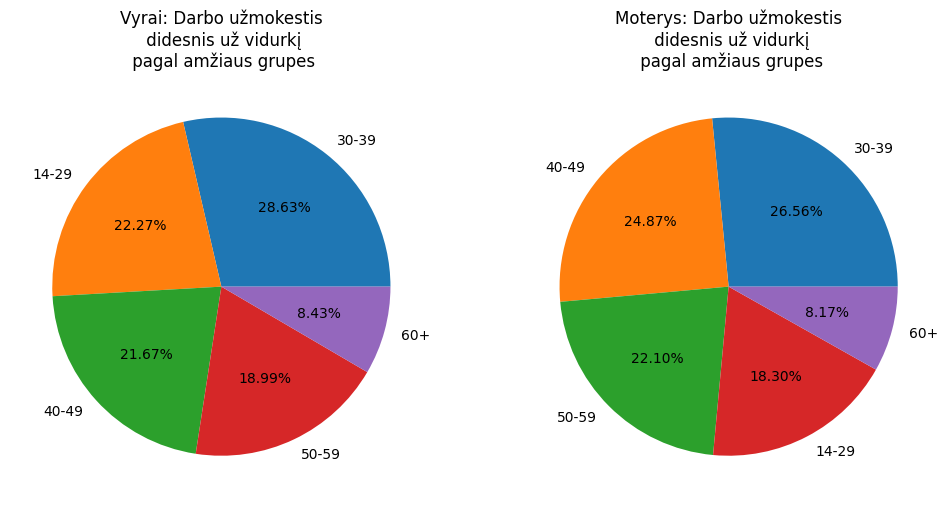

In [27]:
#Atrinkite 2018 metais vyrus, moteris, uždirbusius daugiau nei bendras vidutinis atlyginimas, 
# surūšiuokite pagal amžiaus grupes ir atvaizduokite procentinį pasiskirstymą su pie plot. 
# Vyrus, moteris atskiruose pie plotuose.

#Nuskaitome failą
df = pd.read_csv('../../DATA/DUS2018.csv')

# Suskaičiuojame vidutinį atlyginimą
vidutine_alga = df['bdu_spalio'].mean()

# Filtruojame duomenis pagal vidutinį atlyginimą ir lytį
df_vyrai = df[(df['bdu_spalio'] >= vidutine_alga) & (df['lytis'] == 'M')]
df_moterys = df[(df['bdu_spalio'] >= vidutine_alga) & (df['lytis'] == 'F')]

# Grupavimas pagal amžiaus grupes
vyru_amzius_grupes = df_vyrai['amzius'].value_counts()
moteru_amzius_grupes = df_moterys['amzius'].value_counts()

# Sukuriame subplots, kad galėtume turėti 2 pie grafikus
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Pie grafikas vyrams
ax1.pie(x=vyru_amzius_grupes.values, labels=vyru_amzius_grupes.index, autopct='%.2f%%')
ax1.set_title('Vyrai: Darbo užmokestis\n didesnis už vidurkį\n pagal amžiaus grupes')

# Pie grafikas moterims
ax2.pie(x=moteru_amzius_grupes.values, labels=moteru_amzius_grupes.index, autopct='%.2f%%')
ax2.set_title('Moterys: Darbo užmokestis\n didesnis už vidurkį\n pagal amžiaus grupes')

# Rodyti grafikus
plt.show()

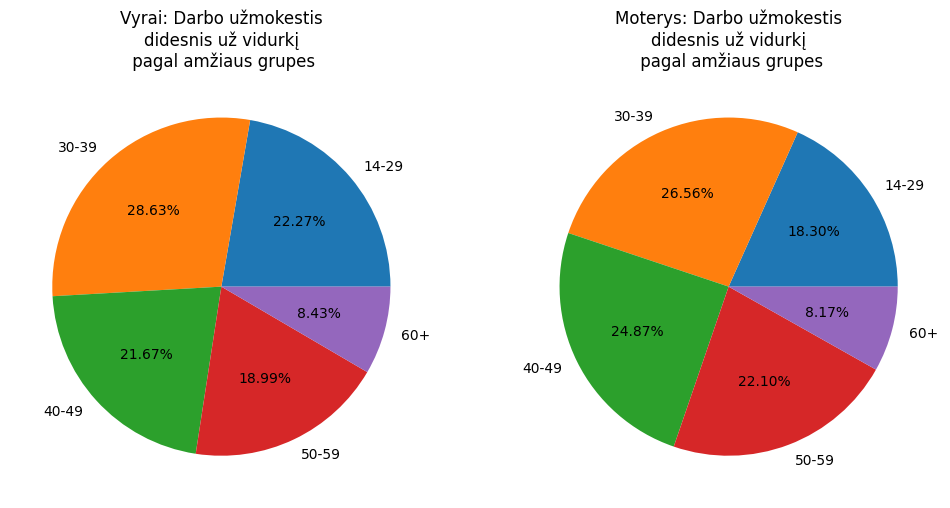

In [25]:
#Atrinkite 2018 metais vyrus, moteris, uždirbusius daugiau nei bendras vidutinis atlyginimas, 
# surūšiuokite pagal amžiaus grupes ir atvaizduokite procentinį pasiskirstymą su pie plot. 
# Vyrus, moteris atskiruose pie plotuose, kuriuose amziaus grupes isdest*omos ta pacia tvarka
import pandas as pd
import matplotlib.pyplot as plt

# Nuskaitome failą
df = pd.read_csv('../../DATA/DUS2018.csv')

# Sukuriama nauja lentelė, kurią sudaro pasirinkti stulpeliai
dfII = df[['lytis', 'bdu_spalio', 'amzius']]

# Suskaičiuojame vidutinį atlyginimą
vidutine_alga = dfII['bdu_spalio'].mean()

# Filtruojame duomenis pagal vidutinį atlyginimą ir lytį
df_vyrai = dfII[(dfII['bdu_spalio'] >= vidutine_alga) & (dfII['lytis'] == 'M')]
df_moterys = dfII[(dfII['bdu_spalio'] >= vidutine_alga) & (dfII['lytis'] == 'F')]

# Grupavimas pagal amžiaus grupes ir rūšiavimas. Normalizacija atliekame, 
# kad matytusi procentinis pasiskirstymas. ioje uzduotyje tai nera butina.
vyru_amzius_grupes = df_vyrai['amzius'].value_counts(normalize=True).sort_index()
moteru_amzius_grupes = df_moterys['amzius'].value_counts(normalize=True).sort_index()

# Užtikriname, kad abiejuose rinkiniuose būtų ta pati amžiaus grupių tvarka
all_amzius_grupes = sorted(set(vyru_amzius_grupes.index).union(set(moteru_amzius_grupes.index)))

# Sukuriame subplots, kad galėtume turėti 2 pie grafikus
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Pie grafikas vyrams
ax1.pie(x=vyru_amzius_grupes.values, labels=vyru_amzius_grupes.index, autopct='%.2f%%')
ax1.set_title('Vyrai: Darbo užmokestis\ndidesnis už vidurkį\n pagal amžiaus grupes')

# Pie grafikas moterims
ax2.pie(x=moteru_amzius_grupes.values, labels=moteru_amzius_grupes.index, autopct='%.2f%%')
ax2.set_title('Moterys: Darbo užmokestis\ndidesnis už vidurkį\n pagal amžiaus grupes')

# Rodyti grafikus
plt.show()

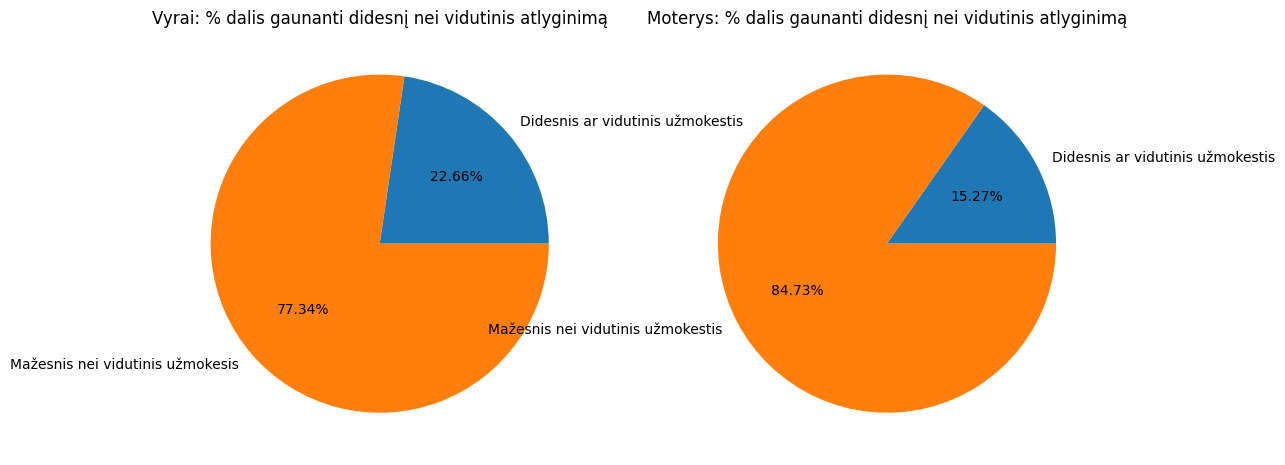

In [2]:
#1) parodykite, kiek % moterų, vyrų nuo visos imties uždirba daugiau, nei vidurkis
import pandas as pd
import matplotlib.pyplot as plt

# Nuskaitome failą
df = pd.read_csv('../../DATA/DUS2018.csv')

# Suskaičiuojame vidutinį atlyginimą
vidutine_alga = df['bdu_spalio'].mean()

# Filtruojame duomenis pagal vidutinį atlyginimą ir lytį
df_vyrai = df[(df['bdu_spalio'] >= vidutine_alga) & (df['lytis'] == 'M')]
df_moterys = df[(df['bdu_spalio'] >= vidutine_alga) & (df['lytis'] == 'F')]

# Suskaičiuojame bendrą dalyvių skaičių
dalyviai = len(df)

# Apskaičiuojame, kiek procentų vyrų ir moterų uždirba daugiau nei vidurkis nuo visų dalyvių
vyru_procentas = (len(df_vyrai) / dalyviai) * 100
moteru_procentas = (len(df_moterys) / dalyviai) * 100

# Sukuriame duomenis pie grafikams
vyru_duomenys = [vyru_procentas, 100 - vyru_procentas]
moteru_duomenys = [moteru_procentas, 100 - moteru_procentas]

# Sukuriame subplots, kad galėtume turėti 2 pie grafikus
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Pie grafikas vyrams
ax1.pie(vyru_duomenys, labels=['Didesnis ar vidutinis užmokestis', 'Mažesnis nei vidutinis užmokesis'], autopct='%.2f%%')
ax1.set_title('Vyrai: % dalis gaunanti didesnį nei vidutinis atlyginimą')

# Pie grafikas moterims
ax2.pie(moteru_duomenys, labels=['Didesnis ar vidutinis užmokestis', 'Mažesnis nei vidutinis užmokestis'], autopct='%.2f%%')
ax2.set_title('Moterys: % dalis gaunanti didesnį nei vidutinis atlyginimą')

# Rodyti grafikus
plt.show()


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Įkelkite duomenis
df = pd.read_csv('../../DATA/DUS2014.csv')
df.head(2)

,svoris,stazas,darbo_laiko_dalis,evrk,im_dydzio_kodas,im_dydis,amzius,atostogu_dienos,sutarties_rusis,virsvalandziu_bdu,...,nuosavybe,bdu_val,nuts,vv_darb_sk,virsvalandziu_sk,premijos,bdu_spalio,priemokos,objectid,issilavinimas
0,35.03,0,0.58,XL,0,1_49,20-29,0,A,0,...,B,6.0,LT,6,0,0,6.0,0,1,G4
1,2.39,0,0.54,XN,0,1_49,20-29,0,A,0,...,B,6.0,LT,12,0,0,6.0,0,2,G2


In [29]:
# 2) atsižvelkite į amžiaus grupes, irgi lyginame su visa imtimi kiekvieną amžiaus grupę
import pandas as pd
import matplotlib.pyplot as plt

# Įkelkite duomenis
df = pd.read_csv('../../DATA/DUS2018.csv')

# Suskaičiuojame vidutinį atlyginimą
vidutine_alga = df['bdu_spalio'].mean()

# Apskaičiuojame bendrą dalyvių skaičių
dalyviai = len(df)

# Apibrėžkite amžiaus grupes
age_groups = ['14-29', '30-39', '40-49', '50-59', '60+']

# Sukurti tuščią sąrašą rezultatams saugoti
results = []

# Iteruoti per kiekvieną amžiaus grupę ir lytį
for age_group in age_groups:
    for gender in ['M', 'F']:
        # Filtruojame dalyvius pagal amžiaus grupę, lytį ir didesnį nei vidutinį atlyginimą
        group_with_higher_salary = df[(df['amzius'] == age_group) & 
                                      (df['lytis'] == gender) & 
                                      (df['bdu_spalio'] >= vidutine_alga)]
        
        # Pridėti rezultatus į sąrašą
        for _, row in group_with_higher_salary.iterrows():
            results.append({
                'amzius': age_group, 
                'lytis': gender, 
                'alga': row['bdu_spalio']
            })

# Konvertuoti rezultatus į DataFrame
ATS = pd.DataFrame(results)

# Surūšiuoti pagal lytį, o tada pagal amziu
grouped = ATS.groupby(['amzius', 'lytis']).size().reset_index(name='count')
# Apskaičiuojame procentinę dalį
grouped['procentine_dalis'] = (grouped['count'] / dalyviai) * 100

# Išrūšiuojame pagal amžių ir lytį, jei reikia
grouped = grouped.sort_values(by=['amzius', 'lytis'])

# Išvesti rezultatus
print(grouped)


  amzius lytis  count  procentine_dalis
0  14-29     F   1206          2.793995
1  14-29     M   2179          5.048188
2  30-39     F   1750          4.054305
3  30-39     M   2801          6.489204
4  40-49     F   1639          3.797146
5  40-49     M   2120          4.911500
6  50-59     F   1456          3.373181
7  50-59     M   1858          4.304513
8    60+     F    538          1.246409
9    60+     M    825          1.911315


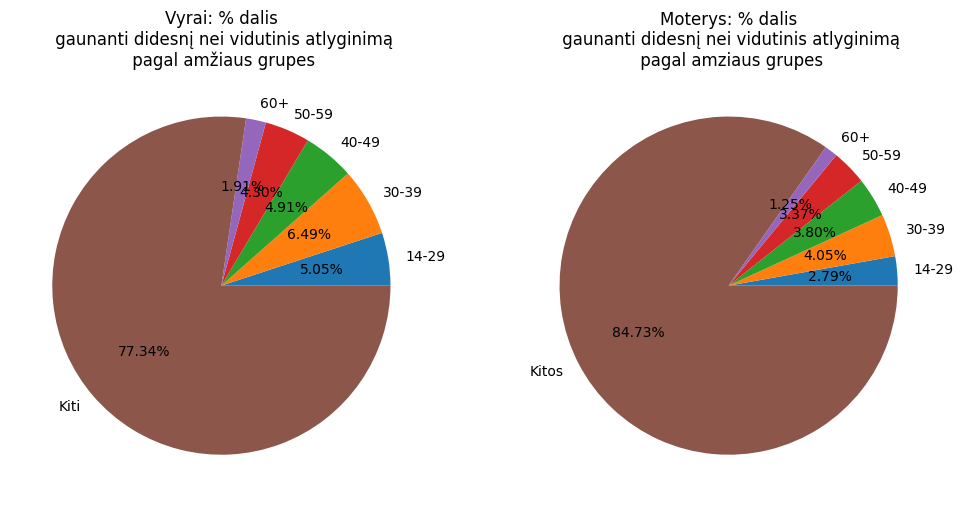

In [1]:
# 2) atsižvelkite į amžiaus grupes, irgi lyginame su visa imtimi kiekvieną amžiaus grupę
import pandas as pd
import matplotlib.pyplot as plt

# Įkelkite duomenis
df = pd.read_csv('../../DATA/DUS2018.csv')

# Suskaičiuojame vidutinį atlyginimą
vidutine_alga = df['bdu_spalio'].mean()

# Apskaičiuojame bendrą dalyvių skaičių
dalyviai = len(df)

# Apibrėžkite amžiaus grupes
age_groups = ['14-29', '30-39', '40-49', '50-59', '60+']

# Sukurti tuščią sąrašą rezultatams saugoti
results = []

# Iteruoti per kiekvieną amžiaus grupę ir lytį
for age_group in age_groups:
    for gender in ['M', 'F']:
        # Filtruojame dalyvius pagal amžiaus grupę, lytį ir didesnį nei vidutinį atlyginimą
        group_with_higher_salary = df[(df['amzius'] == age_group) & 
                                      (df['lytis'] == gender) & 
                                      (df['bdu_spalio'] >= vidutine_alga)]
        
        # Pridėti rezultatus į sąrašą
        for _, row in group_with_higher_salary.iterrows():
            results.append({
                'amzius': age_group, 
                'lytis': gender, 
                'alga': row['bdu_spalio']
            })

# Konvertuoti rezultatus į DataFrame
ATS = pd.DataFrame(results)

# Surūšiuoti pagal lytį, o tada pagal amžius
grouped = ATS.groupby(['amzius', 'lytis']).size().reset_index(name='count')

# Apskaičiuojame procentinę dalį
grouped['procentine_dalis'] = (grouped['count'] / dalyviai) * 100

# Filtruojame duomenis pagal lytį, padarome dvi atskir6as lenteles
vyrai = grouped[grouped['lytis'] == 'M']
moterys = grouped[grouped['lytis'] == 'F']

# Apskaičiuoti bendrą procentą tiems, kurie yra lentelėse
sum_vyrai = vyrai['procentine_dalis'].sum()
sum_moterys = moterys['procentine_dalis'].sum()

# Procentinė dalis tų, kurie nebuvo įtraukti į lentelę
others_vyrai = 100 - sum_vyrai
others_moterys = 100 - sum_moterys

# Pridėti "Others" kategoriją į rezultatus - kuriama eilute
new_row_vyrai = pd.DataFrame([{'amzius': 'Kiti', 'lytis': 'M', 'count': 0, 'procentine_dalis': others_vyrai}])
new_row_moterys = pd.DataFrame([{'amzius': 'Kitos', 'lytis': 'F', 'count': 0, 'procentine_dalis': others_moterys}])

#  Sukurta eilute idedama 
vyrai = pd.concat([vyrai, new_row_vyrai], ignore_index=True)
moterys = pd.concat([moterys, new_row_moterys], ignore_index=True)

# Sukuriame subplots, kad galėtume turėti 2 pie grafikus
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Pie grafikas vyrams
ax1.pie(vyrai['procentine_dalis'], labels=vyrai['amzius'], autopct='%.2f%%')
ax1.set_title('Vyrai: % dalis\n gaunanti didesnį nei vidutinis atlyginimą\n pagal amžiaus grupes')

# Pie grafikas moterims
ax2.pie(moterys['procentine_dalis'], labels=moterys['amzius'], autopct='%.2f%%')
ax2.set_title('Moterys: % dalis\n gaunanti didesnį nei vidutinis atlyginimą\n pagal amziaus grupes')

# Rodyti grafikus
plt.show()

In [2]:
# Sarasu sujungimas
a=[1,2,3]
b=[4,5,6]

#Naujas s1rasas, kuris sujungia a ir d
c=a+b
print(c)

[1, 2, 3, 4, 5, 6]


In [12]:
#KOnvertuoja npy array i python lista
a=np.array(0.5)
a_py=a.tolist()
print (a, a_py)

0.5 0.5


In [23]:
#  2) atsižvelkite į amžiaus grupes, irgi lyginame su visa imtimi kiekvieną amžiaus grupę
#DESTYTOJO SPRENDIMAS. KAd veiktu, reikia dar 29 paskaitos ) uzdavinio sprendima prideti
motAgeGroups = fage.index.tolist()+['Visi kiti']
motAgeVals = fage.values.tolist()+[kitif]
vyrAgeGroups = mage.index.tolist()+['Visi kiti']
vyrAgeVals = mage.values.tolist()+[kitim]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4.5), gridspec_kw={'width_ratios':[1,1]})
#ax1:
#plotting code:
ax1.set_title('Mot')
ax1.pie(x=motAgeVals, labels=motAgeGroups, autopct='%.2f%%')
#ax1.legend(loc=1)
#ax2:
#plotting code:
ax2.set_title('Vyr')
ax2.pie(x=vyrAgeVals, labels=vyrAgeGroups, autopct='%.2f%%')

#ax2.legend(loc='best')
fig.tight_layout()
plt.show()

#

NameError: name 'fage' is not defined

C:\Users\eleta\AppData\Local\Temp\ipykernel_52016\3871270707.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  du['Vyr'] = vyr_amziai
C:\Users\eleta\AppData\Local\Temp\ipykernel_52016\3871270707.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  du['Mot'] = mot_amziai


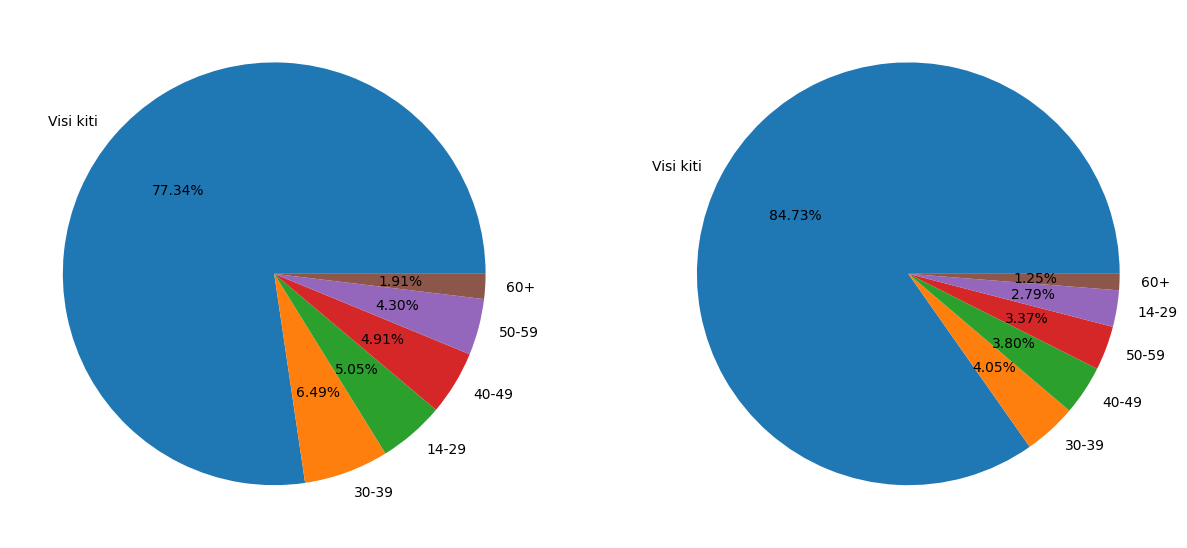

In [25]:
# Manto sprendimas
# 2) atsižvelkite į amžiaus grupes, irgi lyginame su visa imtimi kiekvieną amžiaus grupę
dus2018 = pd.read_csv('../../DATA/DUS2018.csv')
du = dus2018[['amzius','lytis','bdu_spalio']]
du.head(2)
vid_du = du['bdu_spalio'].mean()



vyr_amziai = []

for am, fdu, lyt in zip(du['amzius'], du['bdu_spalio'], du['lytis']):
    if fdu > vid_du and lyt == 'M':
        vyr_amziai.append(am)
    else:
        vyr_amziai.append('Visi kiti')

mot_amziai = []
mot_algos = []

for am, fdu, lyt in zip(du['amzius'], du['bdu_spalio'], du['lytis']):
    if fdu > vid_du and lyt == 'F':
        mot_amziai.append(am)
    else:
        mot_amziai.append('Visi kiti')


du['Vyr'] = vyr_amziai
du['Mot'] = mot_amziai
amziai_vyr = du['Vyr'].value_counts()
amziai_mot = du['Mot'].value_counts()
fig, axes = plt.subplots(1,2, figsize = [15,10])

axes[0].pie(x=amziai_vyr.values, labels=amziai_vyr.index, autopct='%.2f%%')
axes[1].pie(x=amziai_mot.values, labels=amziai_mot.index, autopct='%.2f%%')
plt.show()